# The Oscars
### 2017 NYC Green Taxi Trips

#### Dataset:
The original dataset: http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml  
Preprocessed data structure: https://github.com/goelshruti/Crazy-Taxi-F18 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing

Read the data from the pickle structure (the data without null value). 

In [33]:
df = pd.read_pickle('./data/df_new.pkl')

Create column date by the pickup time

In [34]:
df['date'] = df['lpep_pickup_datetime'].dt.day

In [35]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,payment_type,trip_type,trip_duration,month,day,total_custom,weekend_Trip,hour,airport,date
0,2017-12-31 23:55:09,2017-12-31 23:59:14,1,17,61,1,1.1,5.5,0.5,0.5,...,2,1.0,4.083333,12,6,6.80,1,23,0,31
1,2017-12-31 23:30:36,2017-12-31 23:37:20,1,61,49,1,1.1,6.5,0.5,0.5,...,2,1.0,6.733333,12,6,7.80,1,23,0,31
2,2017-12-31 23:02:26,2017-12-31 23:19:37,1,228,188,1,4.1,15.5,0.5,0.5,...,1,1.0,17.183333,12,6,20.15,1,23,0,31
3,2017-12-31 23:12:24,2017-12-31 23:16:55,1,228,26,1,0.8,5.0,0.5,0.5,...,2,1.0,4.516667,12,6,6.30,1,23,0,31
4,2017-12-31 23:53:11,2017-12-31 23:55:40,1,225,225,1,0.5,4.0,0.5,0.5,...,2,1.0,2.483333,12,6,5.30,1,23,0,31


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249711 entries, 0 to 2293364
Data columns (total 24 columns):
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
RatecodeID               int64
PULocationID             int64
DOLocationID             int64
passenger_count          int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             int64
trip_type                float64
trip_duration            float64
month                    int64
day                      int64
total_custom             float64
weekend_Trip             int32
hour                     int64
airport                  int32
date                     int64
dtypes: datetime64[ns](2), float64(11), int32(2), int64(9)
memory usage: 411.9 MB


## Count of the trips

In [37]:
df_new = df.groupby(['month','day','date','hour'])['PULocationID'].count().reset_index(name="count")

In [38]:
df_new = df_new.rename(columns={'day':'weekday'})
df_new.head()

,month,weekday,date,hour,count
0,1,0,2,0,204
1,1,0,2,1,129
2,1,0,2,2,101
3,1,0,2,3,82
4,1,0,2,4,73


In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 5 columns):
month      8759 non-null int64
weekday    8759 non-null int64
date       8759 non-null int64
hour       8759 non-null int64
count      8759 non-null int64
dtypes: int64(5)
memory usage: 342.2 KB


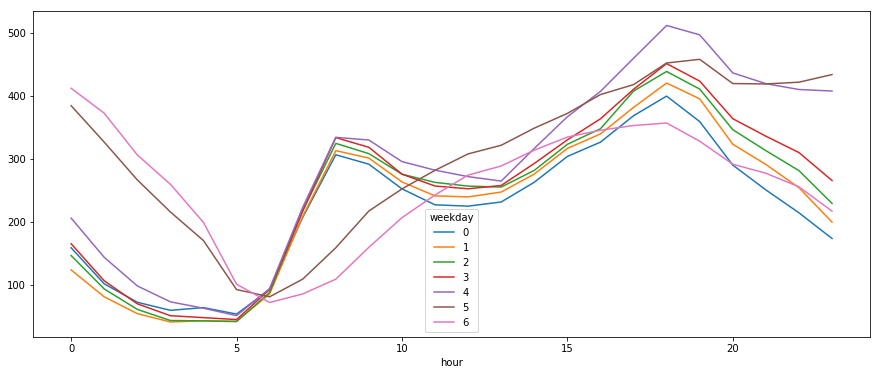

In [40]:
df_new.pivot_table('count', index='hour', columns='weekday').plot(figsize=(15,6))

We can see from the curves that the trip pattern of weekend is diffrent with weekdays. The Morning peak and Evening peak are well shown in the image. The curves rises earlier in all the morning of weekdays, and people take more trips in the night of Friday and Saturday.

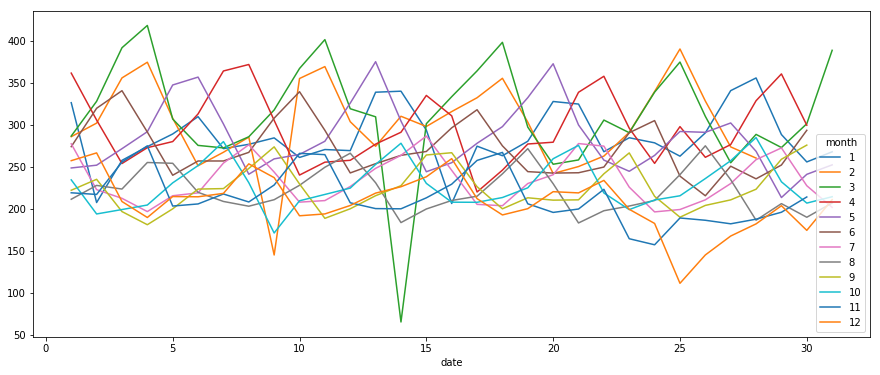

In [41]:
df_new.pivot_table('count', index='date', columns='month').plot(figsize=(15,6))

In [42]:
df_week_count = df_new.groupby(['weekday'])['count'].sum().reset_index(name="count_sum")
df_week_count = df_week_count.sort_values(by='count_sum', ascending=False)

Text(0,0.5,'Weekday')

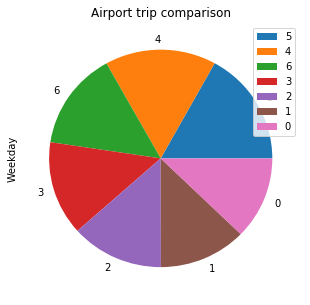

In [30]:
plot = df_week_count.plot.pie(y='count_sum', title = 'Airport trip comparison', figsize=(5, 5))
plot.set_ylabel('Weekday')

Saturday has the most trip and Monday has the least.

### Count of trips comparing between airport trip and non-airport trip

In the processing step, we marked all to-airport trips in a new column called "airport".

In [44]:
df_new = df.groupby(['month','day','date','hour','airport'])['PULocationID'].count().reset_index(name="count")

In [45]:
df_airport = df_new[df_new['airport']==1]

In [46]:
df_airport_week = df_new.groupby(['day','airport'])['count'].sum().reset_index(name="count")
df_airport_week.head()

,day,airport,count
0,0,0,270928
1,0,1,5042
2,1,0,281287
3,1,1,4531
4,2,0,296801


Text(0,0.5,'Trip counts')

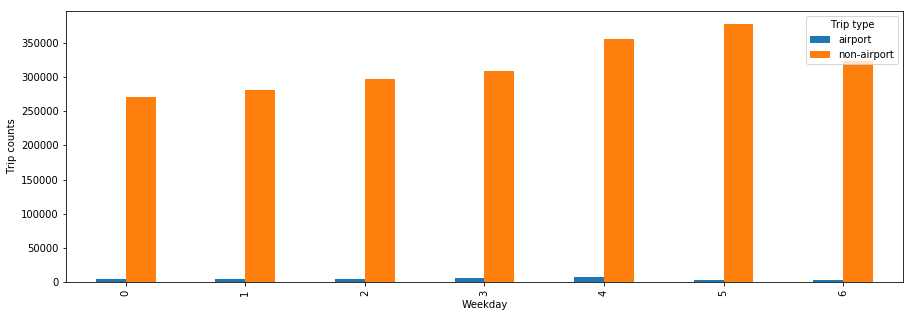

In [47]:
df_airport_week = pd.DataFrame(columns=['airport', 'non-airport']);
for i in range (0, 7):
    d_y = df_new[(df_new.day==i)&(df_new.airport==1)]['count'].sum()
    d_n = df_new[(df_new.day==i)&(df_new.airport==0)]['count'].sum()
    df_add = pd.DataFrame({'airport': d_y, 'non-airport': d_n}, index=[i])
    df_airport_week = df_airport_week.append(df_add)
#cost_trip
df_airport_week.plot.bar(figsize=(15, 5))

plt.legend(title="Trip type", loc=1)
plt.xlabel("Weekday")
plt.ylabel("Trip counts")

The comparison beteewn airport trip and non-airport trip in a week.

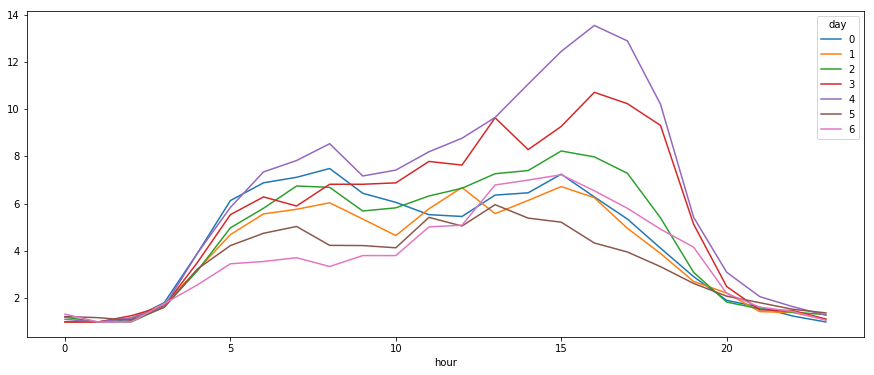

In [48]:
df_airport.pivot_table('count', index='hour', columns='day').plot(figsize=(15,6))

From the graph we can see that people from the airport usually take the trip in daytime. The peak start from 4am and ends at 8pm (It is earlier than the peak of other trips, which make sense that people usually get to the airport 2 hours before the flight).  
The weekday of the most airport trip is Friday (the purple line marked as 4). People may get back from a bussiness trip.

## Visualization

In [49]:
import seaborn as sns

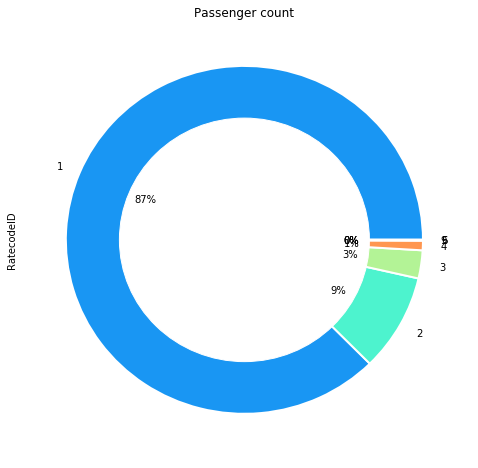

In [50]:
plt.figure(figsize=(8,8))
df.groupby(['passenger_count'])['RatecodeID'].count().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",4),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("Passenger count")
plt.show()

In [51]:
df_s=df.sample(frac=0.1)

In [52]:
df_s.dtypes

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
passenger_count                   int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                       float64
trip_duration                   float64
month                             int64
day                               int64
total_custom                    float64
weekend_Trip                      int32
hour                              int64
airport                           int32
date                              int64
dtype: object

#### The relationship between fare amount and trip distance

C:\Users\Christine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


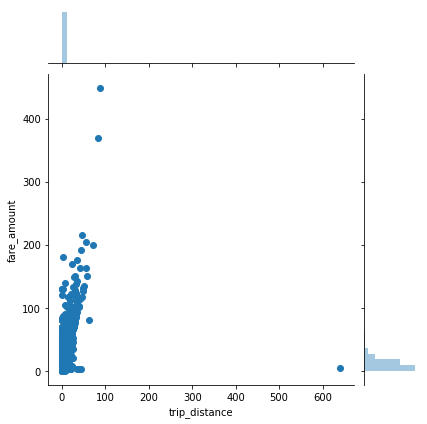

In [53]:
sns.jointplot(x=df_s["trip_distance"], y=df_s["fare_amount"], kind='scatter')

#### Distribution of trip_distance

C:\Users\Christine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


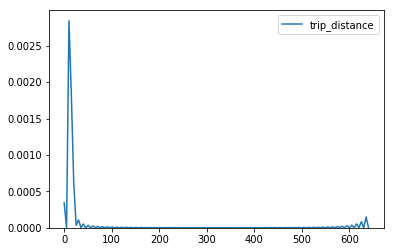

In [54]:
sns.kdeplot(df.trip_distance)

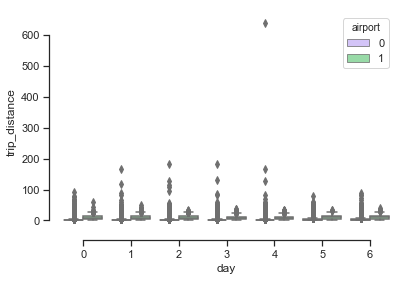

In [55]:
sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="trip_distance",
            hue="airport", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

### Heatmap of correlation

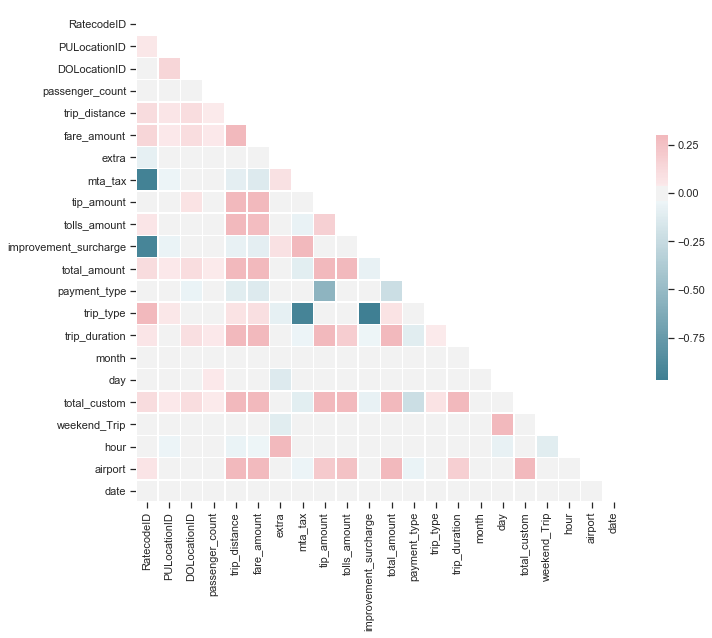

In [56]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [57]:
df_week_count

,weekday,count_sum
5,5,381689
4,4,362591
6,6,326924
3,3,314582
2,2,302137
1,1,285818
0,0,275970


### Linear regression

C:\Users\Christine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


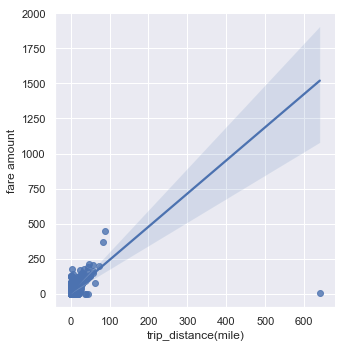

In [59]:
sns.set()

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="trip_distance", y="fare_amount", 
               truncate=True, height=5, data=df_s)

# Use more informative axis labels than are provided by default
g.set_axis_labels("trip_distance(mile)", "fare amount")